# Modeling Ordinary Differential equations (ODEs)

This tutorial is a meant to help you learn some basics about ordinary differential equations (ODE) and numerical algorithms to solve them. This can be viewed as a simple way to "model" a physical system, i.e. represent reality by a physical and then mathematical abstraction, and explore that construct with analytical or numerical methods. We will typically want to solve for some property, say location, that changes with another parameter, say time. Think of an object being thrown and we wish to predict it's trajectory from the initial velocity, for example.<br>

At the end of the toturial, you will have developed your own functions for different ways of solving such equations, using the Euler, Midpoint, and 4th-order Runge-Kutta methods. Those are different numerical approaches for what is, analytically, a single equation. These methods will be used later in the course and perhaps even for your own future research. <br>

This is not a numerical modeling class, and we mainly focus on what can be learned about the physics from actual and numerical experiments. However, some background is useful. If you are interested in more details, please refer to these lecture notes, for example, __[Numerical Geodynamics: Finite Difference and Finite Element solutions to solid Earth dynamics problems](https://www-udc.ig.utexas.edu/external/becker/Geodynamics557.pdf)__ This is optional reading.

# The definition and example of ODEs

ODE: an equation that involves the derivative of the function we want to solve for, and that has only one independent variable (otherwise it's a partial differential equation, i.e., PDE).<br>

For example, $\frac{dy}{dx} = f(x)$ can be solved by integration $y=\int f(x)dx + C$.<br>

where $C$ can be determined by additional information, such as a boundary condition on $y$.

# The order of an ODE
The order of an ODE is determined by the largest number of derivatives invovled, e.g. <br>
$\frac{d^2y}{dx^2} + q(x)\frac{dy}{dx} = r(x)$ is "second order".

### Example 1: A trajectory 

Let's assume we do want to explore how an object will move. At every given time, $t$, it's location is given by $x(t)$ (where $x$ could also be a vector, in 3-D, for example). How the location changes is given by the time derivative of the location,

$
\frac{d x(t)}{dt} = v(t)
$

where $v$ is the velocity. If we know $x$ at time $t=t_0$ and we know $v$, then we can get the next location by solving the ODE for $x$. 

### Example 2: The Harmonic Oscillator

You derived in class that Hooke's law says that the elastic restoring force is $F_e = -k x$ where $x$ is the displacement, and $k$ the spring constant. If we consider inertia, $F_i = m a = m \ddot{x}$, and equal the two, <br>
$
m \ddot{x} + k x=0
$ 
is an example of an ODE written in the above form. This ODE has a relatively simple solution

$
x(t) = A \cos(\omega t + \phi)\quad\mathrm{with}\quad \omega=\sqrt{\frac{k}{m}}
$

where $\omega=2\pi f$ is the angular frequency, $f$ frequency (period $T=1/f$), and $\phi$ the phase. The derivation of that solution is not hard (we can start by guessing that a harmonic might solve things). 
These figures illustrate how the motion of the weight is like seeing a wave (the $\cos$) travel by.
<br>
<img width=100 src=https://upload.wikimedia.org/wikipedia/commons/d/d5/Animated-mass-spring-faster.gif>
<img width=300 src=https://upload.wikimedia.org/wikipedia/commons/7/74/Simple_harmonic_motion_animation.gif>
<br>

However, here, we are mainly focusing on numerical solutions. For that, it is useful to analytically reduce the complexity of the ODEs.

# Reduce ODEs to sets of first order equations
However, we can always reduce ODEs to sets of first order equations. For example, the above equation 
$\frac{d^2y}{dx^2} + q(x)\frac{dy}{dx} = r(x)$
can be rewritten as <br>
$\frac{dy}{dx} = z(x)$ <br>
$\frac{dz}{dx} = r(x) - q(x)z(x)$ <br>

In general, we can write     $\frac{dy_i(x)}{dx}  = f_i(x,y,...,y_N)$ <br>
for a system of $N$ coupled ODEs, all dependent on the independent variable $x$, which is typically time, $t$. <br>

Or in vector form, $\frac{d\mathbf{y}}{dx} = \mathbf{f}(x,\mathbf{y})$. <br>

The actual solutions of ODEs will depend on the types of boundary conditions on $\mathbf{y}$ and the initial conditions.

# Initial Value Problems
In initial value problems, $\mathbf{y}$ is known for some $x = x_0$, and the system evolves from there 
to $x_f$ some finite time later.

Over the course, you will encounter physical systems governed by different sets of ODEs such as the harmonic oscillator, the double pendulum, two state-variable rate- and state- friction, Lorenz equations as a simplified description of thermal convection in the atmosphere, etc.  

Recall that $\frac{dy}{dx} = f(x)$ can be solved by integration $y=\int f(x)dx + C$.<br>

If we replace $x$ with $t$ and solve the system from $t=t_0$ to $t=t_f$ with initial conditions $y_0=y(t=t_0)$, we get <br>
$y(t)=y_0 + \int_{t_0}^{t_f} f(t,y(t)) dt$.

We can break down the integral into $step$ $sizes$ $h$ from $t_i$ to $t_i+h$ with $n=(t_f-t_0)/h$ partial integrals such that we only need to solve <br>
$I = \int_{t_i}^{t_i+h} f(t,y(t)) dt$ <br>
as cheaply as possible numerically.

Example 1 from above is one of these problems. We know the initial location, $x_0$, and can get the new location at time $t=t_0+h$ by advancing $x(t=t_0+h) = x_0 + \frac{dx}{dt} h + \ldots$.


# Numerical solution of ODEs
Now we will introduce you three numerical approximations to the partial integral $I$.

## Warm-up - basics on functions
Before we hop onto solving ODEs, let's introduce some basics on creating functions and passing variables/lists/vectors/functions in Python. <br>

In the following cell, we will create a function called evaluate_function, which takes in three inputs - a variable, a list and a vector, makes modifications to them and calls a function "calcSin", and return the modified items.  

In [1]:
import numpy as np # load Python package numpy. We will use its functions to create arrays, calculate sine and assign Pi.

# We create var, list, vec and func.
var0  = 1. * np.pi                  # a variable, Pi.
list0 = ["Apple", "Banana", 5]      # a list that contains three elements, two strings and a number.
vec0  = np.array([[1, 2], [3, 4]])  # a two dimensional numpy array for the vector. You may also use a list for simply cases. 

# define a function "calcSin" that calculate the sine of the input. 
def calcSin(var):      # the sytax is "def function_name(input1, input2, ...):". Don't forget ":".
    res = np.sin(var)  # We need an indentation here and in the following lines. 
    return res

print('Before modifications ...')
print('var0  is   ', var0)
print('list0 is   ', list0)
print('vec0  is   ', vec0)
print('calcSin(var0) is', calcSin(var0))


def evaluate_function(var, list,function): # this function has a function as its argument!
    res1   = var**2
    res2   = function(var) # If we define the functions we will use beforehand, we can call them, like calcSin, in this function.
    list[1] = "cake"
    return res1,res2

[res1a, res2a] = evaluate_function(var0,list0,np.sin)
[res1b, res2b] = evaluate_function(var0,list0,np.cos)


print('After modifications ...')
print('list is', list)
print('res1 is   ', res1a,res2a)
print('res2 is   ', res1b,res2b)
    

Before modifications ...
var0  is    3.141592653589793
list0 is    ['Apple', 'Banana', 5]
vec0  is    [[1 2]
 [3 4]]
calcSin(var0) is 1.2246467991473532e-16
After modifications ...
list is <class 'list'>
res1 is    9.869604401089358 1.2246467991473532e-16
res2 is    9.869604401089358 -1.0


# The Euler method
The simpliest numerical approximation to $I$ is $I = f(t_i, y(t_i)) \cdot h$ such that $y(t_i+h) = y(t_i) + h \cdot f(t_i,y(t_i))$. <br> 

Note: the Euler method is generally not a good idea and if $y$ has some curvature, the Euler scheme will lead to large errors quickly! <br>

If you do Taylor expansion to $y(t)$, you will get
$y(t) \approx y(t_0) + (t-t_0) \cdot \frac{dy(t_0)}{dt} + \frac{(t-t_0)^2}{2!} \cdot \frac{d^2y(t_0)}{dt^2} + \frac{(t-t_0)^3}{3!} \cdot y''' + ...$. <br>

For our problem, we get <br>
$y(t_i+h) \approx y(t_i) + h \cdot f(t_i,y(t_i)) + \frac{h^2}{2} \cdot \frac{df}{dt} + ...$ <br>

The error of the Euler scheme goes as $O$("order of")($h^2$), and the scheme is therefore, by definition, only accurate to $first$ $order$. It means that tiny time steps would have to be taken for a good solution. 

In [2]:
# Exercise - Could you fill in the missing code part to finish the Euler method function?


# Define the function f(x), which takes in vector x at the current time - let's make this simple, and have the derivative only 
# depend on time, t, such that dx/dt(x,t) = t, and then f(t)=1/2 t^2 +C
def fmine(t, x):
    return t

# Define the Euler function 
def euler(t, y, f, neq, h):
    # The function will take in y at the current time and update and return the y one step size h further according to function fx.
    # neq: number of equations in the reduced order ODE system. In this case, neq == 1.
    yout=np.zeros(neq)
    for i in range(neq):            # Loop over all the equations in the system.
        # NOTE: in python, index starts from 0. Therefore, for neq==1, i will start from 0. 
        # In this case, there is only i==0 in the loop. 
        # If you want to check value in i, try print it out and uncomment the following line:
        # print(i)
        yout[i] = y[i] + h * f[i](t,y) 
        # Please fill out the above missing parts ?? to make this function work!
    return yout

In [3]:
# This exercise will update x from x=3 at t=2 and return x at t=2+h. 
#  according to the function form f(x)=x*x based on the Euler method.
neq = 1
h   = 0.05
t   = 2.     # Note that this is a number
y   = [3.]   # Note that this is a list. For what is a List in python, here is some description https://www.w3schools.com/python/python_lists.asp.
f   = [fmine]   # If your system contains mulitple equations, we put them all in list f. 
res = euler(t, y,f, neq, h)

print(res)

[3.1]


That is not very helpful on its own, is it? So let us plot the output and make this a bit more intuitive.

nsteps, dt 51 0.06


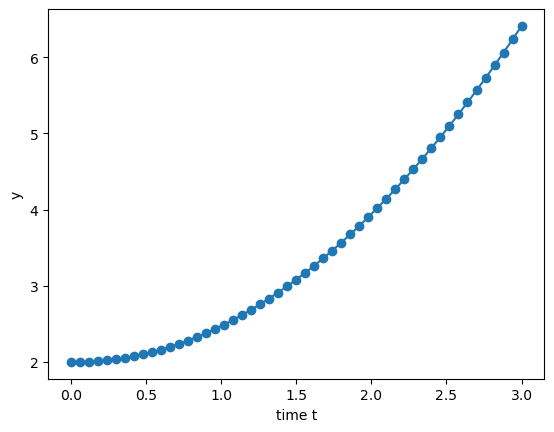

In [5]:
import matplotlib.pyplot as plt

# how many equal timesteps to take?
nsteps=51
# we only have one dimension
ndim=1
# this is where we want to end up in the end
tmax=3
# determine the time stepping from the number of steps (note the -1)
dt=tmax/(nsteps-1)
# some output
print('nsteps, dt',nsteps,dt)

tstore=np.zeros(nsteps)
ystore=np.zeros([nsteps,ndim])

t0=0
yinit=2

i=0 # init the lop
y=[yinit] # initial value, use a list
t=t0 # we start at t_0 

while(i < nsteps):
    tstore[i]=t
    ystore[i,:]=y[:]
    y = euler(t,y,[fmine],ndim,dt)
    t = t+dt
    i=i+1
    
    
plt.plot(tstore,ystore[:,0],'o-')
plt.ylabel('y')
plt.xlabel('time t')
plt.show()



# Analyze the results

* What does the numerical method show you? What sort of function seems to be traced out?
* What solution would you expect? Can you figure out the analytical answer (i.e. what should the solution look like, mathematically)?
* Is the numerical solution accurate? How would you tell?
* Besides comparing the solutions, what other properties might you plot to see how good the solution is?



# The Midpoint method
There are a few improvments to the Euler scheme such as the Midpoint method. <br>

It first evaluates the derivative of $y$ w.r.t to $t$ at half the Euler step and then advances $y$ by the new slope.

$y(t_i+h) = y(t_i) + h \cdot f(t_i + \frac{h}{2}, y(t_i) + f(t_i,y_i)\frac{h}{2})$. <br>

Letting $y_{i+1} = y(t_i +h)$ and $y_i = y(t_i)$, we can follow the numerical implementation recipe <br>
$k_1 = h \cdot f(t_i, y_i)$ <br>
$k_2 = h \cdot f(t_i+h/2, y_i+k_1/2)$ <br>
$y_{i+1} = y_i + k_2 + O(h^3)$ <br>

You can see the method is $second$ $order$ $accurate$. Note that higher accuracy has come at a cost, $f$ now needs to be evaluated twice and once at a $y$ value different from $y_i$, and there are overall more operations per time step. However, since the error is now $O(h^3)$, we can take larger time steps.

In [6]:
# Exercise - Could you fill in the missing code part to finish the Midpoint method function?

# Let's reuse the function fx defined above. Recall that if we define a function beforehand, we can use them in later functions.

# Define the Midpoint function.
def midpoint(t, y, f, neq, h):
    # The function will take in y at the current time and update and return the y one step size h further according to function fx.

    k1 = np.zeros(neq) 
    k2 = np.zeros(neq)
    yout = np.zeros(neq)
    
    for i in range(neq):            # Loop over all the equations in the system.
        k1[i] = f[i](t,y)*h     
    for i in range(neq):   
        k2[i] = f[i](t+h/2,y+k1/2)*h
    yout=y+k2
    
    return yout

In [7]:
# lets compare the step updates

y=[yinit]
res1 = euler(t0, y, f, neq, h)
res2 = midpoint(t0, y, f, neq, h)

print(res1,res2)

[2.] [2.00125]


Hmm, OK, but what does that look like graphically, how do those methods compare?

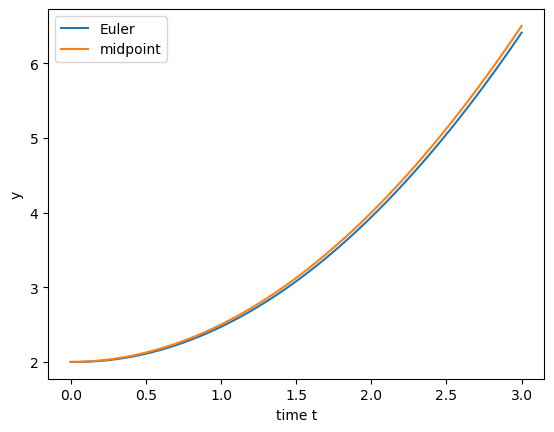

In [8]:
nmethod=2
# make more room in ystore
ystore=np.zeros([nsteps,ndim,nmethod])

i=0
yinit=2
# now we have two solutions
ye=[yinit] # initial value, use a list
ym=[yinit]
t=0

while(i < nsteps):
    tstore[i]=t
    ystore[i,:,0]=ye[:]
    ystore[i,:,1]=ym[:]
    ye = euler(t,ye,[fmine],ndim,dt)
    ym = midpoint(t,ym,[fmine],ndim,dt)
    t = t+dt
    i=i+1
    
plt.plot(tstore,ystore[:,:,0],tstore,ystore[:,:,1])
plt.legend(['Euler', 'midpoint'])
plt.ylabel('y')
plt.xlabel('time t')
#plt.ylim([0,40])
plt.show()


Well, which one is better? Which one is correct? 

Consider that our function's analytical solution can be found by means of integrating 

$\frac{dy}{dx} = x$ 

which is 

$y=\frac{1}{2} x^2+c$.

Let's compare the analytical solution with the two numerical attempts.

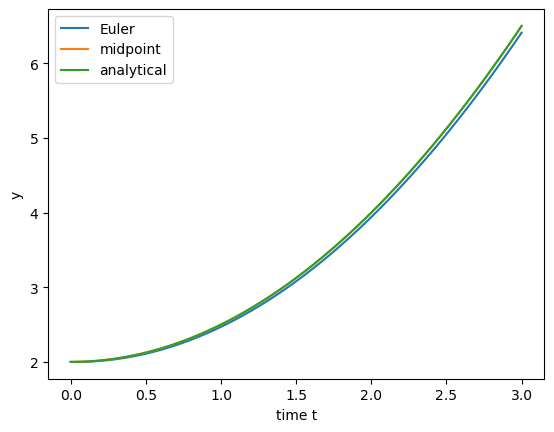

In [9]:
ya = yinit+0.5*tstore**2
plt.plot(tstore,ystore[:,0,0],tstore,ystore[:,0,1],tstore,ya)
plt.legend(['Euler', 'midpoint','analytical'])
plt.ylabel('y')
plt.xlabel('time t')
plt.show()


Therefore, even for this simple problem, midpoint is better than Euler.

# 4th order Runge-Kutta method

You may now wonder how one could improve on the mid point method, and it comes down to a tradeoff between the number of function evolutions and striving for higher polynomial approximations. After a trade-off consideration, at least for smooth function, the *4th order Runge-Kutta method* generally works well. It is 4th order accurate and the recipe is 
<br>
$k1=h \cdot f(t_i,y_i)$ <br>
$k2=h \cdot f(t_i+h/2, y_i+k_1/2)$ <br>
$k3=h \cdot f(t_i+h/2, y_i+k_2/2)$ <br>
$k4=h \cdot f(t_i+h, y_i + k3) $  <br>
$y_{i+1} = y_i + k_1/6 + k_2/3 + k_3/3 + k_4/6 + O(h^5)$ <br>

For more details, adaptive step size Runge Kutta and relevant resources, please check out the Numerical Geodynamics lecture notes and reference therein. 

In [10]:
# Exercise - implement the 4th order Runge-Kutta method.


# Define the 4th order Runge-Kutta function.
def rk4(t, y, f, neq, h):
    # The function will take in x at the current time and update and return the x one step size h further according to function fx.
    k1 = np.zeros(neq) 
    k2 = np.zeros(neq)
    k3 = np.zeros(neq)
    k4 = np.zeros(neq)
    for i in range(neq):   # Loop over all the equations in the system.
        k1[i]=f[i](t    , y   )*h 
    for i in range(neq): 
        k2[i]=f[i](t+h/2, y+k1/2)*h
    for i in range(neq): 
        k3[i]=f[i](t+h/2, y+k2/2)*h
    for i in range(neq): 
        k4[i]=f[i](t+h  , y+k3)*h
   
    yout = y + (k1 + 2*k2 + 2*k3 + k4)/6
    return yout

In [11]:
y = [yinit]
res1 = euler(t0, y, f, neq, h)
res2 = midpoint(t0, y, f, neq, h)
res3 = rk4(t0,y,f,neq,h)
print(res1,res2,res3)


[2.] [2.00125] [2.00125]


So this seems to work. But now, let's try something a little more interesting to integrate. 

Let's use the function 

$\frac{y(t,y)}{dt} = y \sin(t)^2$. 

This turns out (if in doubt, use __[Wolfram Alpha](https://www.wolframalpha.com/input?i=Solve%5BD%5By%2Ct%5D+%3D+Sin%5Bt%5D**2+y%5D)__ ) to have the solution 

$y(t) = c \exp(\frac{1}{2}(t -\sin(t)\cos(t)))$.

Let's check how well our methods compare. 

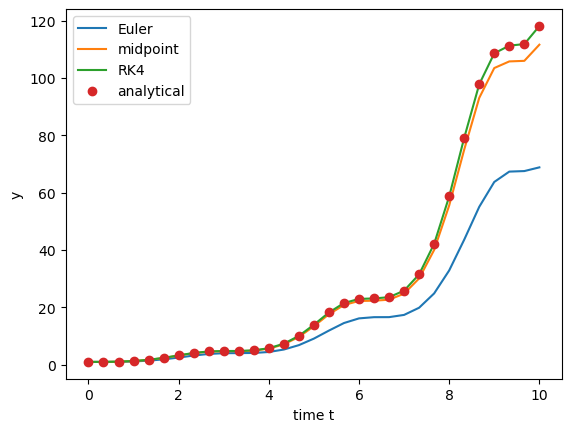

In [12]:
def fmine(t, x):
    return np.sin(t)**2 * x[0]

f=[fmine]
nmethod=3
nsteps=31


tstore=np.zeros(nsteps)
ystore=np.zeros([nsteps,ndim,nmethod])

tmax=10
dt=tmax/(nsteps-1)

i=0
yinit=1
# now we have two solutions
ye=[yinit] # initial value, use a list
ym=[yinit]
yk=[yinit]
t=0

while(i < nsteps):
    tstore[i]=t
    ystore[i,:,0]=ye[:]
    ystore[i,:,1]=ym[:]
    ystore[i,:,2]=yk[:]
    ye = euler(t,ye,f,ndim,dt)
    ym = midpoint(t,ym,f,ndim,dt)
    yk = rk4(t,yk,f,ndim,dt)
    t = t+dt
    i=i+1
    
yana = yinit *np.exp(1/2*(tstore-np.sin(tstore)*np.cos(tstore)))

plt.plot(tstore,ystore[:,:,0],tstore,ystore[:,:,1],tstore,ystore[:,:,2],tstore,yana,'o')
plt.legend(['Euler', 'midpoint','RK4','analytical'])
plt.ylabel('y')
plt.xlabel('time t')
#plt.ylim([0,40])
plt.show()

# Last word
Congratulations! <br>

Now you should have learned about ordinary differential equations and have implemented three numerical algorithms to solve them!

In the repository, there is a python file - ode.py - that contains the implementation of the three methods. ode.py and its functions will be called by other Jupyter Notebook tutorials in this course. <br> 

They may look slightly different from what you have implemented here. We hope that differnt implementations may help you understand the methods better and get familiar with Python. Definitely there is always room to improve. <br>

Feel free to make your own customized Euler, Midpoint, and 4th order Runge-Kutta functions and put them in a Python file and use them for your later numerical explorations! <br>

A tip to use functions defined in standalone python files: To use ode.py, you just need to do "import ode as odeLib" before you call any functions in it. If you have another python file named A.py that contains a function named B1. What you want to do is to put A.py in the same folder of your executing python file/Jupyter Notebook, then do "import A as any_name_you_like", and call B1 following the syntax any_name_you_like.B1 in the code cell.